In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
air_quality= pd.read_csv("air_quality_no2_long.csv")

In [5]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [6]:
air_quality=air_quality.rename(columns={"date.utc":"datetime"})

In [7]:
air_quality

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [8]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [10]:
air_quality["datetime"]=pd.to_datetime(air_quality["datetime"])

In [11]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [12]:
air_quality["datetime"].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [14]:
air_quality["datetime"].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [15]:
air_quality["month"]=air_quality["datetime"].dt.month

In [16]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [20]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Text(0, 0.5, 'Hour of the day')

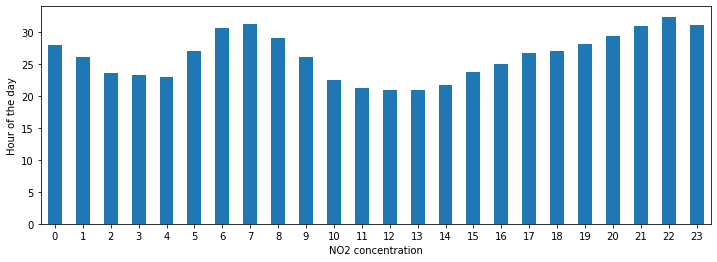

In [36]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("NO2 concentration")
plt.ylabel("Hour of the day")

In [38]:
no2=air_quality.pivot(index="datetime",columns="location", values="value")

In [39]:
no2

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


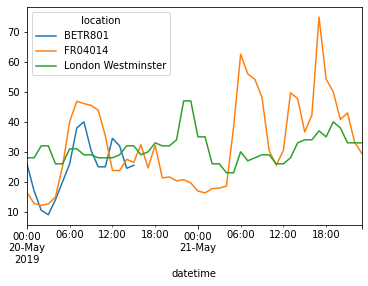

In [41]:
no2["2019-05-20":"2019-05-21"].plot();

In [43]:
monthly_max = no2.resample("M").max()

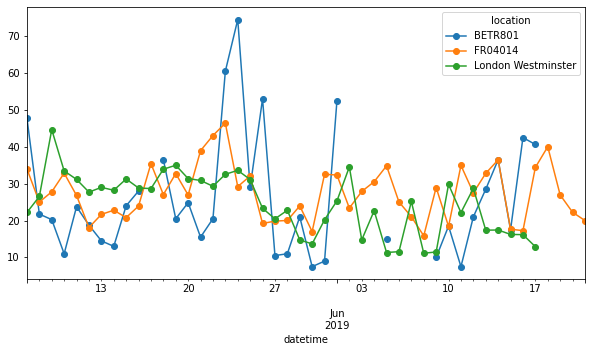

In [44]:
no2.resample("D").mean().plot(style="-o", figsize=(10, 5));